In [180]:
import pandas as pd
# -*- coding: utf-8 -*-
import click
import logging
from pathlib import Path
import numpy as np
from sklearn.neural_network import MLPRegressor
import pyswarms as ps
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
import itertools
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")



In [2]:

logger = logging.getLogger(__name__)
logger.info('making final data set from raw data')
    
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)


2019-06-01 12:29:13,241 - __main__ - INFO - making final data set from raw data


In [43]:
data = pd.read_csv('/Users/b1017579/Documents/Projects/Fish/fish-stock-optimiser/data/raw/fish_2.csv')
data.head()

,spp,k1,k2,safety,kobe,yield,yieldAav
0,brill,0.797784,0.612246,0.747743,0.700,0.925067,0.091733
1,brill,0.167569,0.378240,0.633513,0.100,0.905800,0.039380
2,brill,0.395910,0.719339,0.530906,0.300,0.939703,0.144815
3,brill,0.038554,0.875182,0.621983,0.050,0.971708,0.069346
4,brill,0.659448,0.387724,0.689158,0.825,0.844454,0.079166


In [45]:
single_optimiser = data.copy()
# single_optimiser['reward'] = single_optimiser.safety + single_optimiser['kobe.n'] + single_optimiser.yield
# single_optimiser['reward'] = data[['safety','kobe.n','yield','yieldAav']].sum(axis=1)
single_optimiser['reward'] = 4*data['safety']+3*data['kobe']+2*data['yield']+1*data['yieldAav']
single_optimiser.head()

,spp,k1,k2,safety,kobe,yield,yieldAav,reward
0,brill,0.797784,0.612246,0.747743,0.700,0.925067,0.091733,7.032839
1,brill,0.167569,0.378240,0.633513,0.100,0.905800,0.039380,4.685030
2,brill,0.395910,0.719339,0.530906,0.300,0.939703,0.144815,5.047843
3,brill,0.038554,0.875182,0.621983,0.050,0.971708,0.069346,4.650693
4,brill,0.659448,0.387724,0.689158,0.825,0.844454,0.079166,6.999706


In [46]:
single_optimiser = single_optimiser[['k1','k2','reward']]
single_optimiser.head()

,k1,k2,reward
0,0.797784,0.612246,7.032839
1,0.167569,0.378240,4.685030
2,0.395910,0.719339,5.047843
3,0.038554,0.875182,4.650693
4,0.659448,0.387724,6.999706


In [47]:
single_optimiser['reward'] = single_optimiser['reward'].apply(lambda x: x*-1)
single_optimiser.head()

,k1,k2,reward
0,0.797784,0.612246,-7.032839
1,0.167569,0.378240,-4.685030
2,0.395910,0.719339,-5.047843
3,0.038554,0.875182,-4.650693
4,0.659448,0.387724,-6.999706


In [48]:
print("Argmin")
print(single_optimiser.iloc[np.argmin(single_optimiser['reward']),:])

Argmin
k1        0.762065
k2        0.405883
reward   -8.287275
Name: 329, dtype: float64


/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [49]:

X = single_optimiser[['k1','k2']]
y = single_optimiser.reward
clf = MLPRegressor(hidden_layer_sizes=(10,20), activation='identity', solver='adam', alpha=1,
                                        batch_size='auto', learning_rate='constant', learning_rate_init=0.5, power_t=0.5,
                                        max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
                                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
clf.fit(X, y)

clf.predict(np.array([0.797784,0.612246]).reshape(1, -1))

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([-6.0811931])

In [50]:
def fit_svr(data):
    X = data[['k1','k2']]
    y = data.reward
    clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
    clf.fit(X, y)
    return clf

In [51]:
def svr_function(x):
    print(x)
    clf.predict(x)

In [68]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
max_bound = 1 * np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)

svc = MLPRegressor(hidden_layer_sizes=(10,20), activation='relu', solver='adam', alpha=1, batch_size='auto', learning_rate='constant', learning_rate_init=0.5, power_t=0.5,
                                        max_iter=500, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False,
                                        momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
hidden_size_layer = [0,1,2,3]
print(hidden_size_layer)

param_grid={
    'learning_rate_init': [0.05, 0.01, 0.005, 0.001],
    'hidden_layer_sizes': [x for x in itertools.product((20, 30, 40, 50, 100),repeat=3)],
    'activation': ['tanh', 'relu']
}
        
clf = GridSearchCV(estimator=svc, param_grid=param_grid, n_jobs=-1, cv=3, verbose=True, scoring='neg_mean_absolute_error', return_train_score=True)
clf.fit(X, y)
# cross_val_score(clf, X, y, scoring='neg_mean_absolute_error')


# optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)
# cost, pos = optimizer.optimize(clf.predict, iters=1000)


[0, 1, 2, 3]
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 76.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 104.1min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 136.8min finished


Iteration 1, loss = 1.01990448
Validation score: 0.405700
Iteration 2, loss = 0.43899424
Validation score: 0.436857
Iteration 3, loss = 0.41652439
Validation score: 0.427026
Iteration 4, loss = 0.42251230
Validation score: 0.440686
Iteration 5, loss = 0.40795527
Validation score: 0.446390
Iteration 6, loss = 0.41188524
Validation score: 0.437400
Iteration 7, loss = 0.41514931
Validation score: 0.449373
Iteration 8, loss = 0.40500814
Validation score: 0.379492
Iteration 9, loss = 0.40614338
Validation score: 0.446596
Iteration 10, loss = 0.40270674
Validation score: 0.429506
Iteration 11, loss = 0.40466483
Validation score: 0.410524
Iteration 12, loss = 0.41731076
Validation score: 0.437395
Iteration 13, loss = 0.40660877
Validation score: 0.436860
Iteration 14, loss = 0.40308477
Validation score: 0.425656
Iteration 15, loss = 0.40254088
Validation score: 0.446687
Iteration 16, loss = 0.40332123
Validation score: 0.449821
Iteration 17, loss = 0.40358625
Validation score: 0.444906
Iterat

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(10, 20), learning_rate='constant',
       learning_rate_init=0.5, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate_init': [0.05, 0.01, 0.005, 0.001], 'hidden_layer_sizes': [(20, 20, 20), (20, 20, 30), (20, 20, 40), (20, 20, 50), (20, 20, 100), (20, 30, 20), (20, 30, 30), (20, 30, 40), (20, 30, 50), (20, 30, 100), (20, 40, 20), (20, 40, 30), (20, 40, 40), (20, 40, 50), (20, 40, 100), (2...), (100, 100, 30), (100, 100, 40), (100, 100, 50), (100, 100, 100)], 'activation': ['tanh', 'relu']},
       pre_dispatch='2*n

In [74]:
# clf.best_estimator_.predict(np.array([0.038554,0.875182]).reshape(1,-1))
print(clf.best_score_)
clf.best_params_

-0.6038684488718934


{'activation': 'relu',
 'hidden_layer_sizes': (50, 30, 50),
 'learning_rate_init': 0.05}

In [73]:

optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(clf.best_estimator_.predict, iters=10000)

2019-06-01 11:49:22,741 - pyswarms.single.global_best - INFO - Optimize for 10000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10000/10000, best_cost=-8.11
2019-06-01 11:49:48,279 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -8.106311733953381, best pos: [ 0.46338112 -0.99963977]


## Each fish stock

In [165]:
by_fish = data.copy()
# single_optimiser['reward'] = single_optimiser.safety + single_optimiser['kobe.n'] + single_optimiser.yield
# single_optimiser['reward'] = data[['safety','kobe.n','yield','yieldAav']].sum(axis=1)
by_fish['reward'] = 1*data['safety']+1*data['kobe']+1*data['yield']+1*data['yieldAav']
by_fish = by_fish[['spp', 'k1','k2','kobe','yield','reward']]
by_fish['reward'] = by_fish['reward'].apply(lambda x: x*-1)
by_fish.head()

,spp,k1,k2,kobe,yield,reward
0,brill,0.797784,0.612246,0.700,0.925067,-2.464543
1,brill,0.167569,0.378240,0.100,0.905800,-1.678692
2,brill,0.395910,0.719339,0.300,0.939703,-1.915423
3,brill,0.038554,0.875182,0.050,0.971708,-1.713037
4,brill,0.659448,0.387724,0.825,0.844454,-2.437778


In [166]:
print("Argmin")
print(by_fish.iloc[np.argmin(by_fish['reward']),:])

Argmin
spp          brill
k1        0.762065
k2        0.405883
kobe             1
yield     0.914303
reward    -2.81789
Name: 329, dtype: object


/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [167]:
scaler = MinMaxScaler(feature_range=(-1,1))
by_fish[['k1', 'k2']] = scaler.fit_transform(by_fish[['k1', 'k2']])
by_fish.head()

,spp,k1,k2,kobe,yield,reward
0,brill,0.597009,0.228966,0.700,0.925067,-2.464543
1,brill,-0.666462,-0.240820,0.100,0.905800,-1.678692
2,brill,-0.208678,0.443966,0.300,0.939703,-1.915423
3,brill,-0.925116,0.756831,0.050,0.971708,-1.713037
4,brill,0.319668,-0.221779,0.825,0.844454,-2.437778


brill


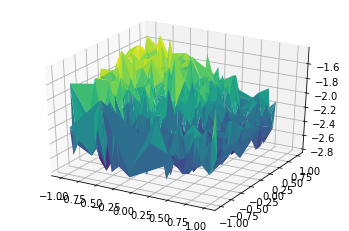

brill


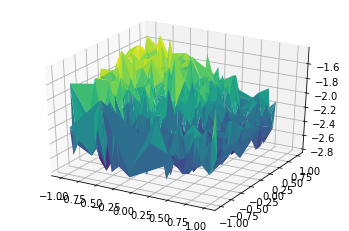

ray


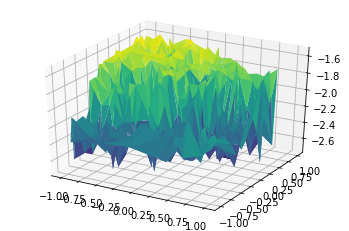

turbot


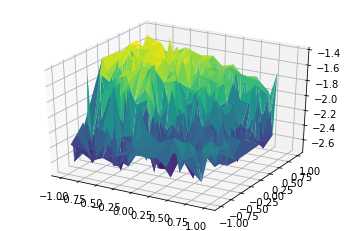

""


In [168]:

# ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
def threed_plot(data):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(data['k1'], data['k2'], data['reward'], cmap=plt.cm.viridis, linewidth=0.2)
    print(data.iloc[0,0])
#     plt.scatter(data['k1'], data['k2'], c=data['reward'], linewidth=0.2)
#     plt.xlabel("k1")
#     plt.ylabel("k2")
    plt.show()
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
    
#     ax.plot_surface(data['k1'], data['k2'], np.array(data['reward']).reshape(-1,2))

#     ax.set_xlabel('k1')
#     ax.set_ylabel('k2')
#     ax.set_zlabel('reward')
    
by_fish.groupby("spp").apply(threed_plot)

# threed_plot(by_fish)

brill
-0.13426768470558584
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


2019-06-01 20:53:53,172 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.45
2019-06-01 20:54:15,170 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.447597210128722, best pos: [-0.28909515 -0.9999789 ]


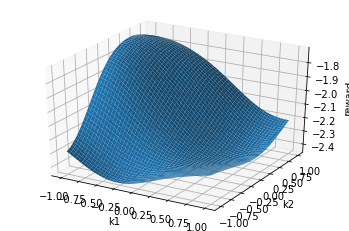

brill
-0.13426768470558584
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


2019-06-01 20:54:37,027 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.45
2019-06-01 20:54:51,981 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.447597340808293, best pos: [-0.28948573 -0.99998292]


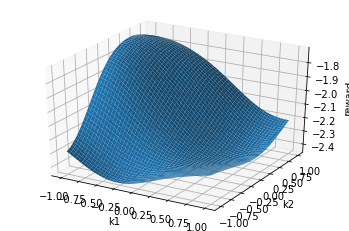

ray
-0.10976635085946569
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


2019-06-01 20:55:22,416 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.44
2019-06-01 20:55:48,547 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.442858482199754, best pos: [ 0.50817213 -0.11718535]


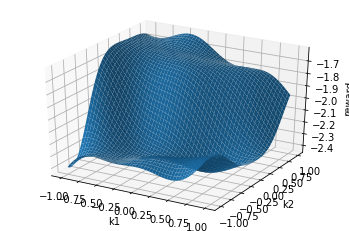

turbot
-0.11474188696434695
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


2019-06-01 20:56:14,895 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.4
2019-06-01 20:56:30,086 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.4042906468027767, best pos: [ 0.21222652 -0.4304925 ]


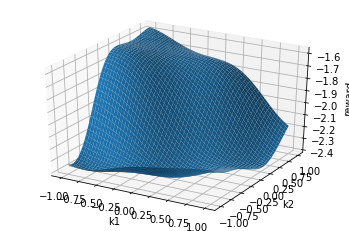

spp
brill     (-2.447597340808293, [-0.2894857289606508, -0....
ray       (-2.442858482199754, [0.508172127725578, -0.11...
turbot    (-2.4042906468027767, [0.21222652093028996, -0...
dtype: object


In [203]:
def threed_func_plotter(m):
    options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
    max_bound = 1 * np.ones(2)
    min_bound = - max_bound
    bounds = (min_bound, max_bound)

    X = np.array(m[['k1','k2']])
    y = np.array(m.reward)
#     clf = MLPRegressor(hidden_layer_sizes=(50, 30, 50), activation='relu', solver='adam', alpha=1,
#                                         batch_size='auto', learning_rate='constant', learning_rate_init=0.05, power_t=0.5,
#                                         max_iter=10000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
#                                         momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    
    svr_model = SVR(gamma='scale', C=1.0, epsilon=0.2)
    param_grid={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 0.7, 1.0],
    'C': [0.01, 0.1, 1, 10, 50, 100]
    }
        
    clf = GridSearchCV(estimator=svr_model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=False, scoring='neg_median_absolute_error', return_train_score=True)
    clf.fit(X, y)
    print(m.iloc[0,0])
    print(clf.best_score_)
    print(clf.best_estimator_)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(-1.0, 1.0, 0.01)
    X, Y = np.meshgrid(x, y)
    zs = np.array([clf.predict(np.array((x,y)).reshape(-1,2)) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('k1')
    ax.set_ylabel('k2')
    ax.set_zlabel('reward')
    
    optimizer = ps.single.GlobalBestPSO(n_particles=1000, dimensions=2, options=options, bounds=bounds)
    cost, pos = optimizer.optimize(clf.predict, iters=1000)

    plt.show()

    return (cost, pos)

best_spots = by_fish.groupby('spp').apply(threed_func_plotter)
print(best_spots)

In [204]:
for i, name in zip(best_spots, best_spots.axes[0]):
    print(name)
    print("reward: {}".format(i[0]))
    print("k1, k2: {}".format(scaler.inverse_transform(np.array(i[1]).reshape(1,-1))))

brill
reward: -2.447597340808293
k1, k2: [[3.55603730e-01 9.15042266e-05]]
ray
reward: -2.442858482199754
k1, k2: [[0.75347271 0.43982344]]
turbot
reward: -2.4042906468027767
k1, k2: [[0.60585606 0.28376143]]


In [ ]:
print(sorted(sklearn.metrics.SCORERS.keys()))

In [172]:
def pso(m):
    X = m[['k1','k2']]
    y = m.reward
    options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
    max_bound = 1 * np.ones(2)
    min_bound = - max_bound
    bounds = (min_bound, max_bound)


#     clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
#     clf.fit(X, y)
#     clf = MLPRegressor(hidden_layer_sizes=(10,20,30), activation='relu', solver='adam', alpha=1,
#                                         batch_size='auto', learning_rate='constant', learning_rate_init=0.5, power_t=0.5,
#                                         max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
#                                         momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#     clf.fit(X, y)
    
#     clf = MLPRegressor(hidden_layer_sizes=(50, 30, 50), activation='relu', solver='adam', alpha=1,
#                                         batch_size='auto', learning_rate='constant', learning_rate_init=0.05, power_t=0.5,
#                                         max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
#                                         momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    
    clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
#     clf.fit(X, y)
    
    clf.fit(X, y)
    optimizer = ps.single.GlobalBestPSO(n_particles=1000, dimensions=2, options=options, bounds=bounds)
    cost, pos = optimizer.optimize(clf.predict, iters=1000)
    
#     print(data.iloc[0,0])
#     print("cost: {}, pos: {}".format(cost, pos))
    return np.round(cost, 4), np.round(pos, 4)
#     return scaler.inverse_transform(np.array(results).reshape(1,-1))

In [173]:
stock_svr = by_fish.groupby("spp").apply(pso)

2019-06-01 19:31:29,690 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.46
2019-06-01 19:31:38,744 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.4596746019032967, best pos: [-0.26753302 -0.98920121]
2019-06-01 19:31:38,770 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.46
2019-06-01 19:31:46,377 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.459674601903297, best pos: [-0.26753304 -0.9892012 ]
2019-06-01 19:31:46,410 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.39
2019-06-01 19:31:53,534 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2

In [176]:
print(stock_svr)
for i in stock_svr:
    print(i[0])
    print(scaler.inverse_transform(np.array(i[1]).reshape(1,-1)))
    

spp
brill     (-2.4597, [-0.2675, -0.9892])
ray        (-2.3874, [0.4181, -0.3419])
turbot     (-2.4421, [0.2155, -0.4235])
dtype: object
-2.4597
[[0.36657014 0.00546261]]
-2.3874
[[0.70854504 0.32789041]]
-2.4421
[[0.60748886 0.28724448]]


In [42]:
print(stock_svr)
for i in stock_svr:
    print(i)
    print(i[0])
    print(scaler.inverse_transform(np.array(i[1]).reshape(1,-1)))
    

spp
brill      (-1.344, [-0.2492, -0.8608])
pollack    (-1.1643, [0.6265, -0.9761])
ray        (-1.2929, [-0.2166, 0.8765])
sprat       (-1.2935, [0.2769, 0.0217])
turbot     (-1.5661, [0.7402, -0.2776])
dtype: object
(-1.344, array([-0.2492, -0.8608]))
-1.344
[[0.37537181 0.06966595]]
(-1.1643, array([ 0.6265, -0.9761]))
-1.1643
[[0.81317621 0.01203007]]
(-1.2929, array([-0.2166,  0.8765]))
-1.2929
[[0.39167011 0.93810317]]
(-1.2935, array([0.2769, 0.0217]))
-1.2935
[[0.63839442 0.51080786]]
(-1.5661, array([ 0.7402, -0.2776]))
-1.5661
[[0.87002029 0.36119452]]
